In [1]:
import sys
sys.path.append("../") # go to parent dir
from util.read_data import DataReader

Le'ts read the data from CSV file, the csv file contains the column names as well


In [2]:
reader = DataReader()
df = reader.read_all_data()

df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
DayOfWeek        object
Month             int64
AdjClose        float64
OpenDiff        float64
CloseDiff       float64
AdjCloseDiff    float64
HighLowDiff     float64
dtype: object

Le't now show few plots

In [15]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

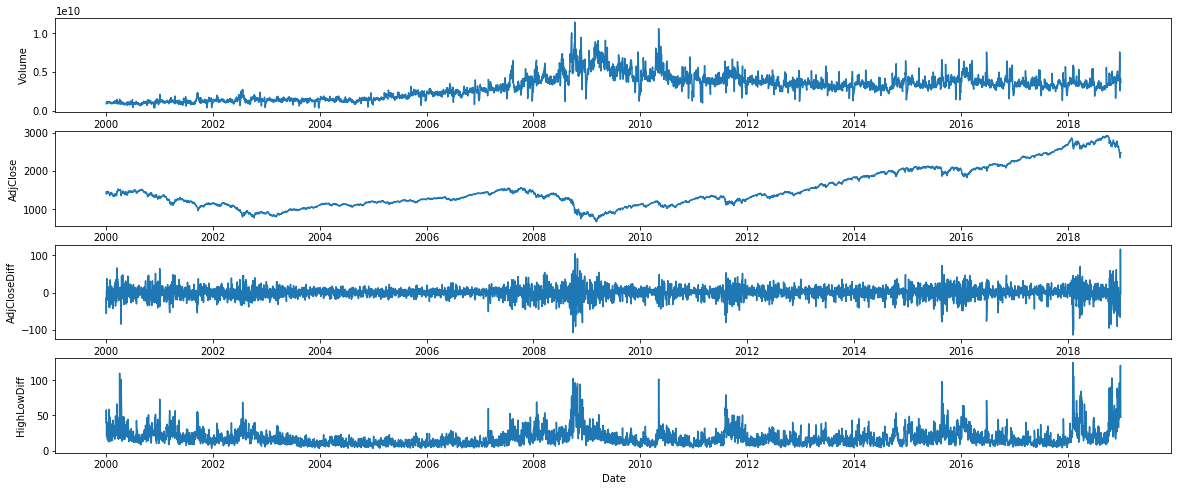

In [18]:
fig, ax = plt.subplots(4,1)
fig.set_size_inches(20, 8)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.lineplot(df.index, df.Volume, ax=ax[0])
sns.lineplot(df.index, df.AdjClose, ax=ax[1])
sns.lineplot(df.index, df.AdjCloseDiff, ax=ax[2])
sns.lineplot(df.index, df.HighLowDiff, ax=ax[3])


The first plot is a plot of the volume in time. It has its high and low peeks. There seems to be the positive trend (increasing of a volume) at least between 2004 - 2008. The market between 2008 - 2009 was more volatile, due to the financial crisis.
The last graph shows difference betwen the AdjClose price of two consecutive trading dates. There seems to be correlation between the trade Volume volatility and the volatility of the price.

In [ ]:
sns.distplot(df.Volume, bins=100)

There seems to be twoo peek in the distribution, peek with low volume of trade and peek with high volume of trades. 
Let's now try to find dependence on calendar day.

In [ ]:
fig, ax = plt.subplots(1,5)
fig.set_size_inches(20, 8)

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
for index, day in enumerate(days):
    plot = sns.distplot(df[df['DayOfWeek'] == day].Volume, bins=100, ax=ax[index])
    plot.set_title(calendar.day_name[index])


    The difference in distributions for different days justifies addind this feature to the mix for prediction of the Volume. Especially Monday seems to have generally trades with higher volumes, which makes sense, as it is first trading day after weekend and there is more chance that some significant information will appear which will influence the market.

Let's now try to find dependence on the month.

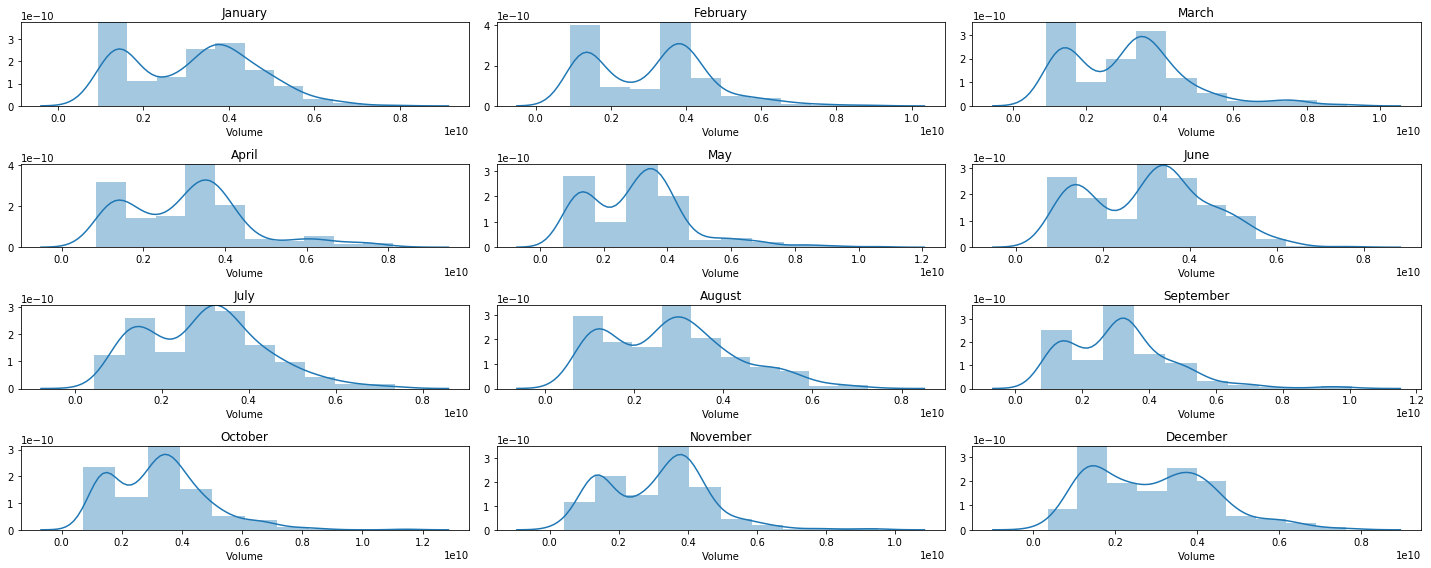

In [17]:
import calendar
fig, ax = plt.subplots(4, 3)
fig.set_size_inches(20, 8)

months = range(1, 13)

for month in months:
    plot = sns.distplot(df[df['Month'] == month].Volume, bins=10, ax=ax[int((month-1) / 3), (month-1) % 3])
    plot.set_title(calendar.month_name[month])
fig.tight_layout()


The distribution shows that adding month feature could be usefull as well.

Let't look at the correlations of the individual numeric features.

In [19]:
df.drop(['DayOfWeek', 'Month'], axis=1).corr()


,Open,High,Low,Close,Volume,AdjClose,OpenDiff,CloseDiff,AdjCloseDiff,HighLowDiff
Open,1.000000,0.999836,0.999755,0.999563,0.157721,0.999563,0.028228,-0.000928,-0.000928,0.097815
High,0.999836,1.000000,0.999706,0.999785,0.160698,0.999785,0.025903,0.011916,0.011916,0.106536
Low,0.999755,0.999706,1.000000,0.999811,0.153282,0.999811,0.031426,0.015803,0.015803,0.082410
Close,0.999563,0.999785,0.999811,1.000000,0.157014,1.000000,0.027754,0.027993,0.027993,0.093363
Volume,0.157721,0.160698,0.153282,0.157014,1.000000,0.157014,-0.047759,-0.025956,-0.025956,0.319480
AdjClose,0.999563,0.999785,0.999811,1.000000,0.157014,1.000000,0.027754,0.027993,0.027993,0.093363
OpenDiff,0.028228,0.025903,0.031426,0.027754,-0.047759,0.027754,1.000000,0.024964,0.024964,-0.224159
CloseDiff,-0.000928,0.011916,0.015803,0.027993,-0.025956,0.027993,0.024964,1.000000,1.000000,-0.158371
AdjCloseDiff,-0.000928,0.011916,0.015803,0.027993,-0.025956,0.027993,0.024964,1.000000,1.000000,-0.158371
HighLowDiff,0.097815,0.106536,0.082410,0.093363,0.319480,0.093363,-0.224159,-0.158371,-0.158371,1.000000


The correlation of individual features Open, High, Low, Close is so strong, that id does not make sense to use all features in the model. Most of the information covered by one feature is also contained in all other features. It makes sense however to use daily difference between High and Low value. There seems to be some correlation between HighLowDiff and Volume.

[1, 3]
